# Análise Exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/camimq/machine_learning_and_time_series/main/03_analise_de_series_temporais/bases/Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
# transforma a coluna Index em uma coluna de data no formato MM/DD/AAAA
df.index = pd.to_datetime(df.DATE, format = '%m-%d-%Y')

In [5]:
# DROPA coluna DATE
# axis = 1 - indica  que é pra deletar a coluna DATA
df.drop('DATE', inplace = True, axis = 1)

In [6]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [8]:
# a data virou índice
# localiza pelo índice, que agora é uma data
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

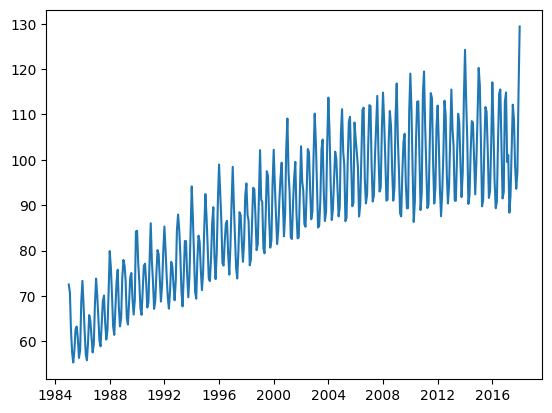

In [9]:
# plota o padrão da série temporal
plt.plot(df.index, df.Value)

In [10]:
# Decomposição de série temporal
resultados = seasonal_decompose(df)

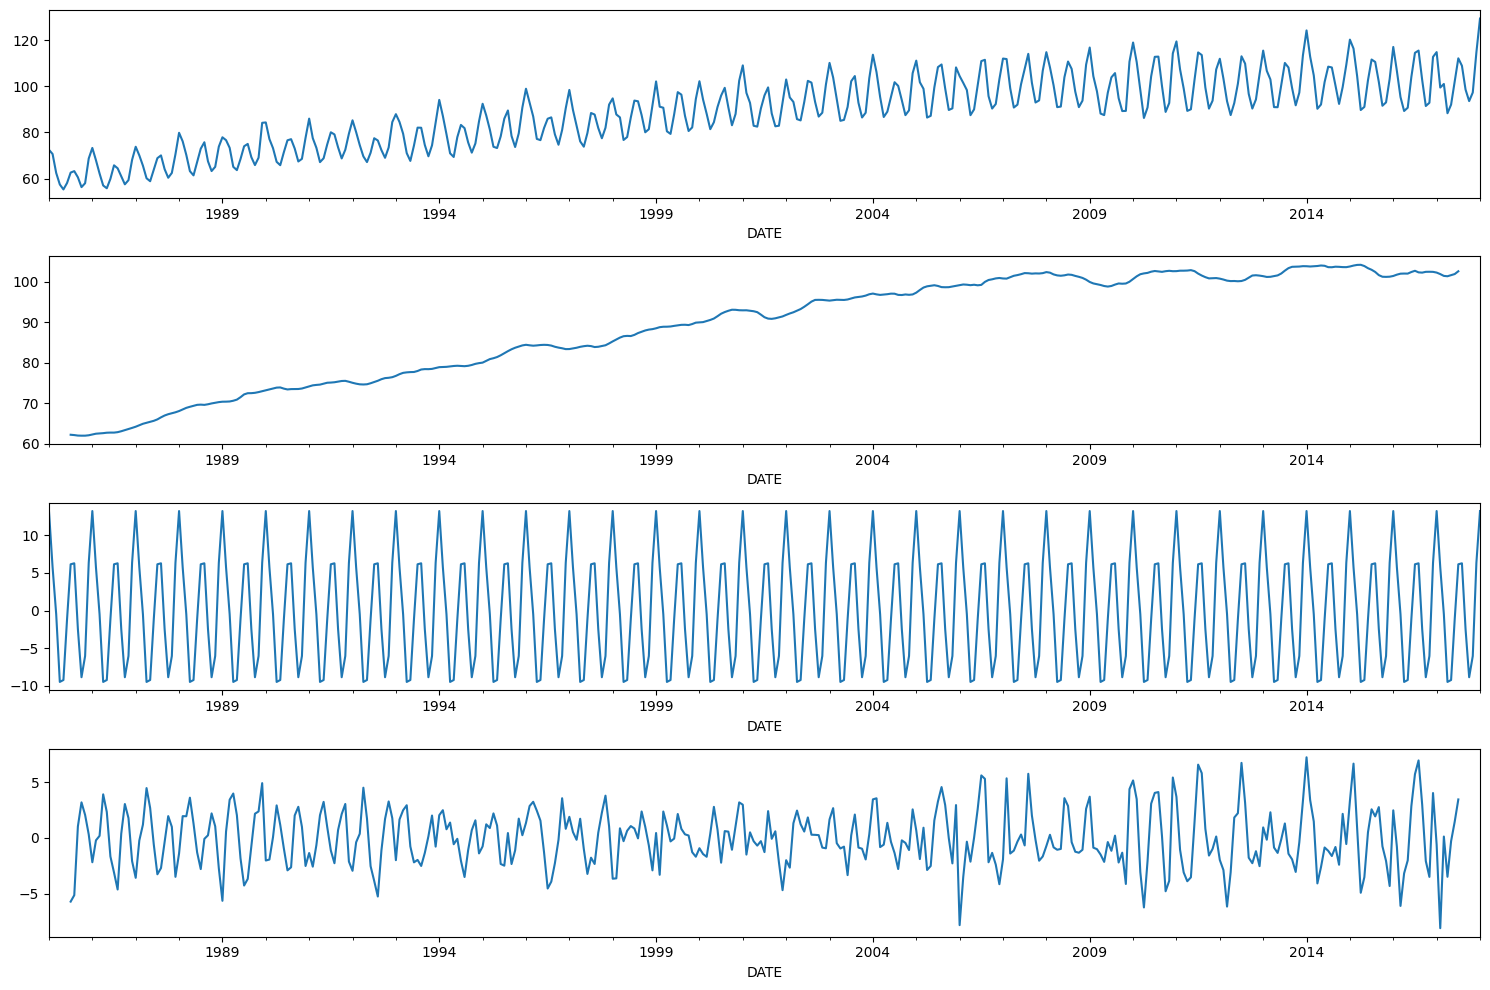

In [11]:
# cria

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()


### Conceitos Estatísticos | Série Tempora Estacionária ou Não Estacionária

- **Série Temporal Estacionária**: movimentação constante. É uma série temporal em que a média, variância e co-variância dos dados, não desloca no tempo.
- **Série Temporal Não Estacionária**:  não é uma movimentação constante, é variável. É uma série temporal em que a média, variância e co-variância dos dados varia com o tempo.

In [12]:
# Estacionária ou não estacionária
# Teste ADF - Augmented Dickey-Fuller Test (determina se existe ou não uma estacionariedade de uma série temporal)

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula; estacionária)

# pvalue = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%.

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
sns.set_style('darkgrid')

In [15]:
X = df.Value.values

In [16]:
result = adfuller(X)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key} : {value}')

Teste ADF
Teste Estatístico: -2.2569903500472277
P-Value: 0.1862146911658734
Valores críticos:
	1% : -3.4476305904172904
	5% : -2.869155980820355
	10% : -2.570827146203181


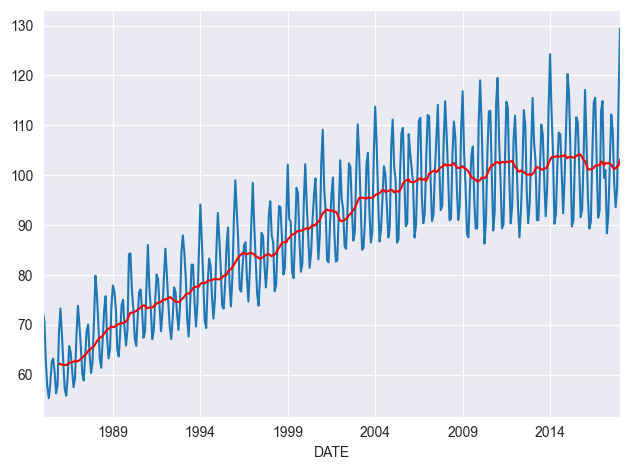

In [17]:
media_movel = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax = ax, legend=False)
media_movel.plot(ax=ax, legend=False, color = 'r')
plt.tight_layout()

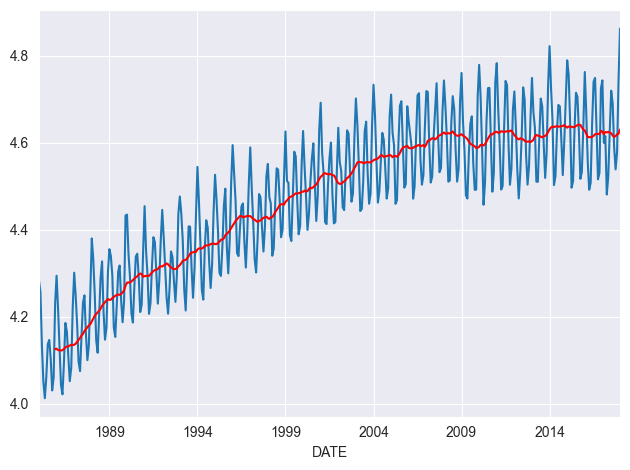

In [18]:
df_log = np.log(df)
media_movel_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
media_movel_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

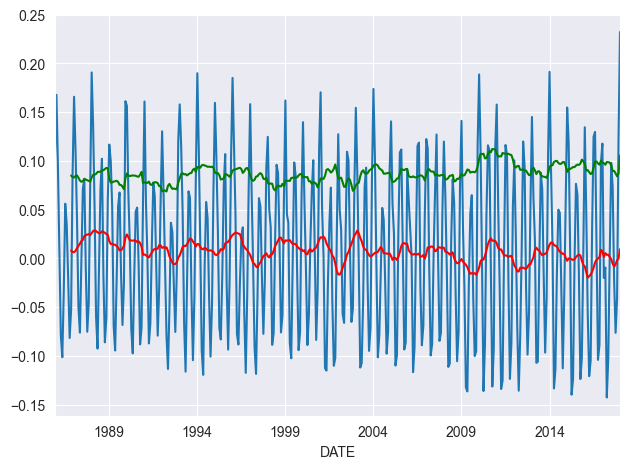

In [19]:
df_s = (df_log - media_movel_log).dropna()
media_movel_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
media_movel_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [20]:
X_s = df_s.Value.values
result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste Estatístico: {result_s[0]}')
print(f'P-Value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key} : {value}')

Teste ADF
Teste Estatístico: -5.211586185365449
P-Value: 8.32563975994576e-06
Valores críticos:
	1% : -3.448147967010838
	5% : -2.8693833397824413
	10% : -2.5709483564645725


In [21]:
df_diff = df_s.diff(1)
media_movel_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std

In [22]:
# f, ax = plt.subplots()
# df_diff.plot(ax=ax, legend=False)
# media_movel_diff.plot(ax=ax, legend=False, color='r')
# std_diff.plot(ax=ax, legend=False, color='g')
# plt.tight_layout()

In [23]:

X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste Estatístico: {result_diff[0]}')
print(f'P-Value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key} : {value}')

Teste ADF
Teste Estatístico: -7.651129568145193
P-Value: 1.7881267354355252e-11
Valores críticos:
	1% : -3.448294490928673
	5% : -2.869447722240253
	10% : -2.570982681065269


In [24]:
# ARIMA - (AR): autoregressivo, I: integrado, MA: moving average
# A(x, y, z) - ACF, PACF

In [25]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [26]:
# 5% da autocorrelação (ACF)
# 1.96 / sqrt(N-d) -> N é o número de pontos do DF e D, é o número de vezes que nós diferenciamos o DF

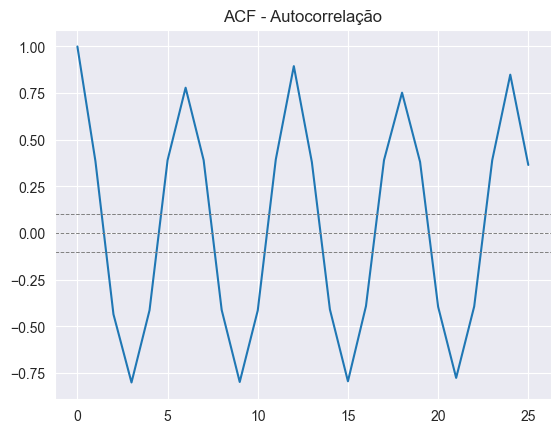

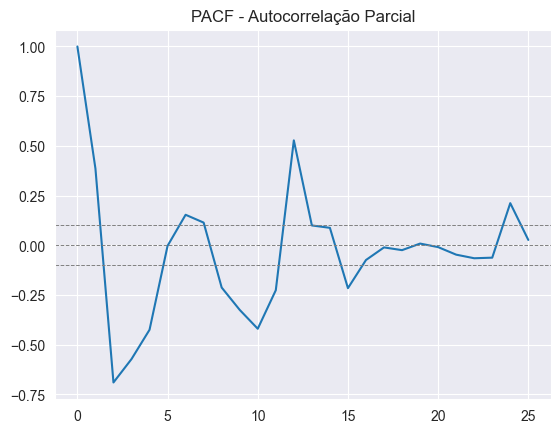

In [27]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) - 1))), linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y= 0, linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) - 1))), linestyle = '--', color='gray', linewidth = 0.7)

plt.title('ACF - Autocorrelação')
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) - 1))), linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y= 0, linestyle = '--', color='gray', linewidth = 0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) - 1))), linestyle = '--', color='gray', linewidth = 0.7)

plt.title('PACF - Autocorrelação Parcial')
plt.show()

In [28]:
# A(x, y, z)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

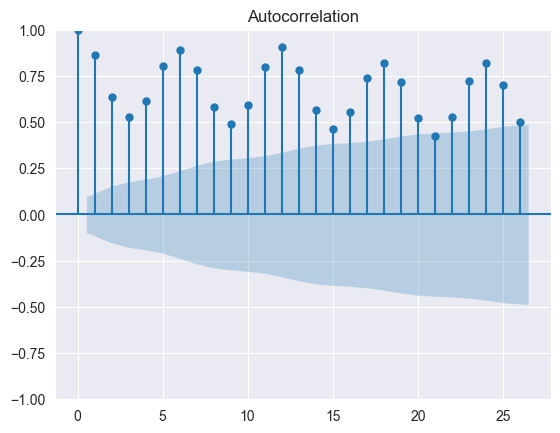

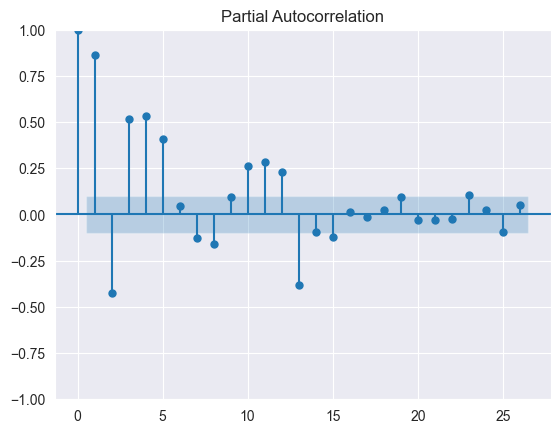

In [30]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

In [31]:

df_forecasting = pd.read_csv(r'G:\My Drive\6. Estudos\1. FIAP\Fase 2 - Machine Learning & Time Series\03. Análise de Séries Temporais\train.csv', index_col='id', parse_dates=['date'])
df_forecasting.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [32]:
df_forecasting

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [33]:
# mostra quantas lojas únicas temos no dataset
df_forecasting['store_nbr'].nunique()

54

In [34]:

# escolha a loja 1 para trabalhar
df_loja1 = df_forecasting.loc[df_forecasting['store_nbr'] == 1, ['date', 'family', 'sales']]
df_loja1 = df_loja1.rename(columns={'date' : 'ds', 'sales' : 'y', 'family' : 'unique_id'})
df_loja1

,ds,unique_id,y
id,,,
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.000000
3,2013-01-01,BEVERAGES,0.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
2999134,2017-08-15,POULTRY,234.892000
2999135,2017-08-15,PREPARED FOODS,42.822998
2999136,2017-08-15,PRODUCE,2240.230000


In [35]:
# separa a base, pegando 2013 como treino
# prepara os tres primeiros meses de 2014 para validação
treino = df_loja1.loc[df_loja1['ds'] < '2014-01-01'] # cria base / variável de treino
valid = df_loja1.loc[(df_loja1['ds'] >= '2014-01-01') & (df_loja1['ds'] < '2014-04-01')] # cria base / variável de validação
h = valid['ds'].nunique()  # cria base / variável que irão trabalhar com o tempo em que será trabalhada a previsão

In [36]:
h

90

In [37]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [38]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

c:\Program Files\Python311\Lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


c:\Program Files\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE:  57.50%


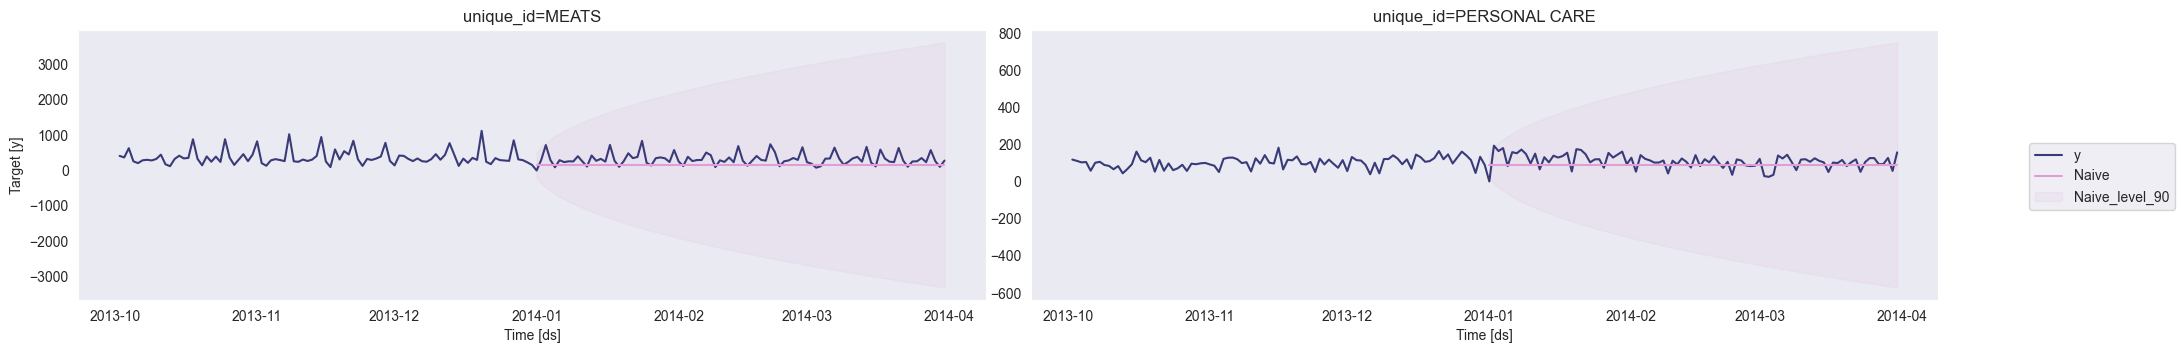

In [39]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f'WMAPE: {wmape1: .2%}')

model.plot(treino, forecast_df, level=[90], unique_ids = ['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

In [40]:
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,AUTOMOTIVE,2014-01-01,2.000,-2.671534,6.671534,0.0000
1,AUTOMOTIVE,2014-01-02,2.000,-4.606546,8.606546,3.0000
2,AUTOMOTIVE,2014-01-03,2.000,-6.091333,10.091333,0.0000
3,AUTOMOTIVE,2014-01-04,2.000,-7.343067,11.343067,0.0000
4,AUTOMOTIVE,2014-01-05,2.000,-8.445867,12.445867,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,13.933,-181.675537,209.541534,31.3880
2966,SEAFOOD,2014-03-28,13.933,-182.809509,210.675507,63.2869
2967,SEAFOOD,2014-03-29,13.933,-183.936981,211.802979,33.6150
2968,SEAFOOD,2014-03-30,13.933,-185.058060,212.924057,18.3520


c:\Program Files\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE:  50.91%


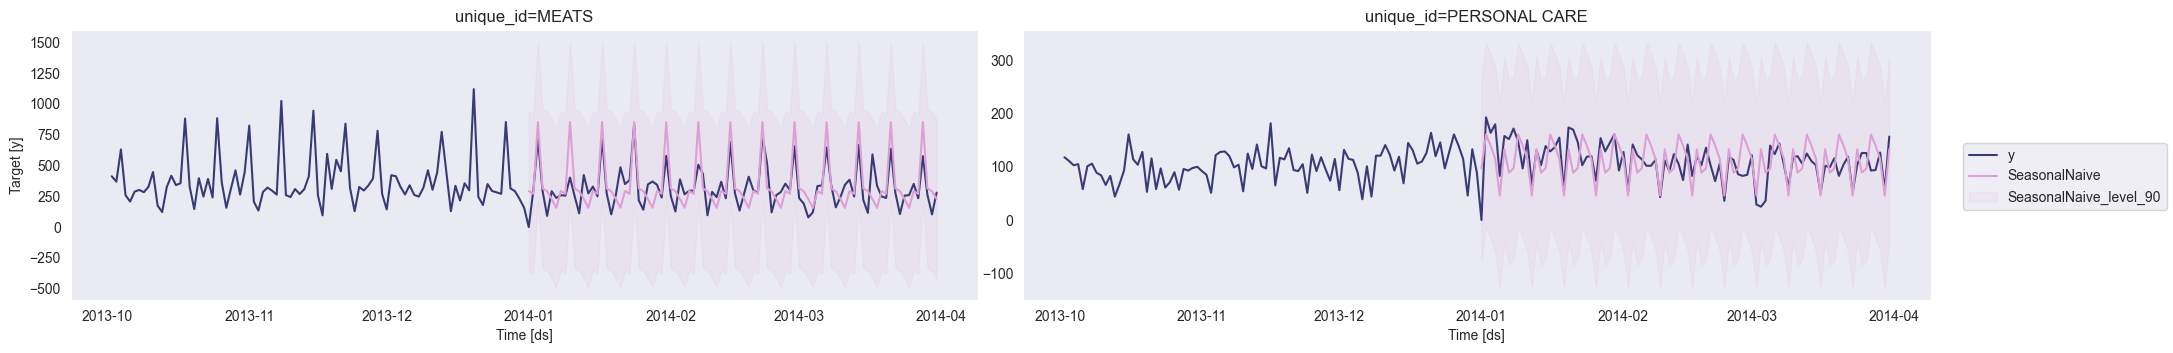

In [41]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f'WMAPE: {wmape2: .2%}')

model_s.plot(treino, forecast_dfs, level=[90], unique_ids = ['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

In [42]:
# model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
# model_sm.fit(treino)

# forecast_dfsm = model_sm.predict(h=h, level=[90])
# forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

# wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
# print(f'WMAPE: {wmape3: .2%}')

# model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids = ['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

c:\Program Files\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE:  51.26%


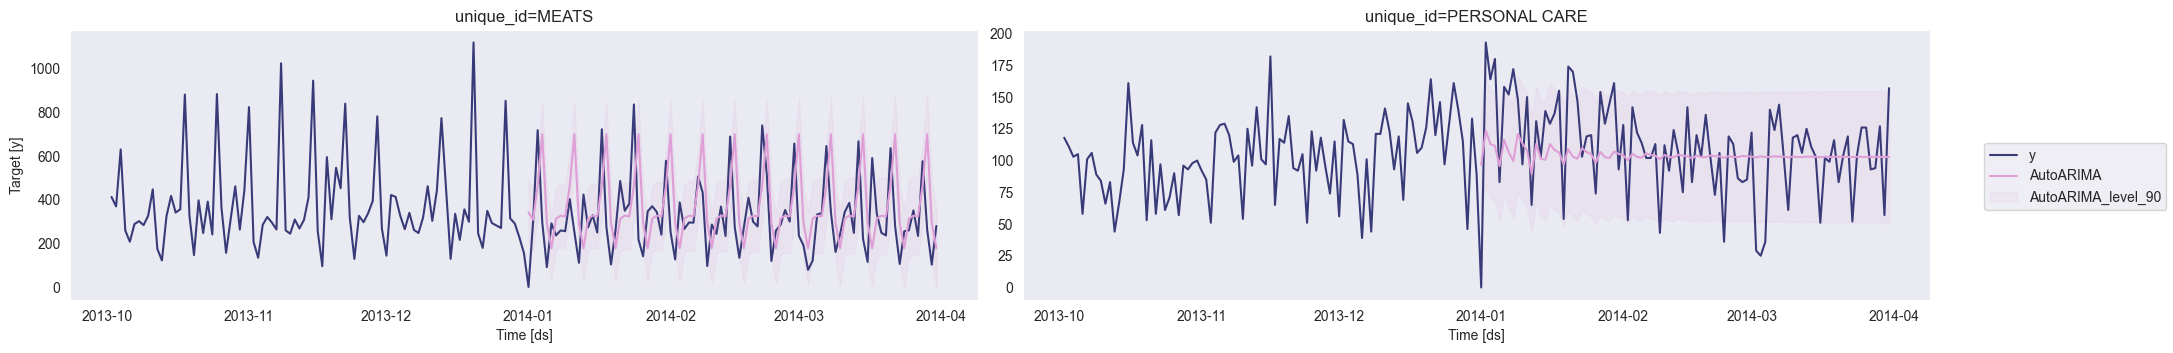

In [43]:
# ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada / MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_a = model_a.predict(h=h, level=[90])
forecast_a = forecast_a.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_a['y'].values, forecast_a['AutoARIMA'].values)
print(f'WMAPE: {wmape4: .2%}')

model_a.plot(treino, forecast_a, level=[90], unique_ids = ['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)